<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework_2/HW2_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

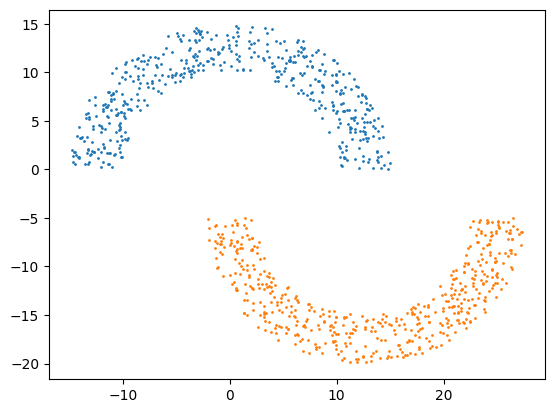

In [326]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [301]:
data_top = np.array(top)
labels_top = np.ones(data_top.shape[0])

data_bottom = np.array(bottom)
labels_bottom = -np.ones(data_bottom.shape[0])

data = np.vstack([data_top, data_bottom])
labels = np.hstack([labels_top, labels_bottom])

data = np.hstack((np.ones((data.shape[0], 1)), data))

In [302]:
def pla(data, labels):
    w = np.zeros(data.shape[1])
    N, d = data.shape
    iterations = 0

    while True:
        idx = np.random.permutation(N)
        update_made = False

        for i in idx:
            if np.sign(np.dot(w, data[i])) != labels[i]:
                w += labels[i] * data[i]
                update_made = True
                iterations += 1

        if not update_made:
            break

    return w, iterations

w, iterations = pla(data, labels)
print(f"PLA converged after {iterations} iterations.")
print(w)

PLA converged after 28 iterations.
[22.          0.70611157 60.41270691]


In [303]:
def linear_regression(data, labels):
    x_t = np.transpose(data)
    xt_x = np.matmul(x_t, data)
    xtx_inv = np.linalg.inv(xt_x)
    xt_x_x = np.matmul(xtx_inv, x_t)
    w = np.matmul(xt_x_x, labels)

    return w

w_lr = linear_regression(data, labels)
w_lr

array([ 0.25482435, -0.00942471,  0.07836822])

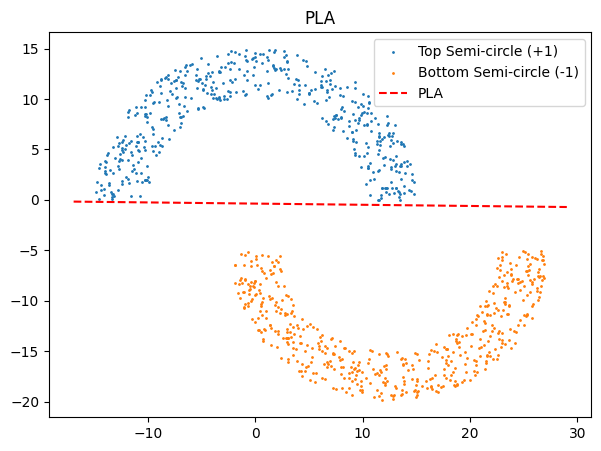

In [304]:
def plot_data_and_boundary(w, title):
    plt.figure(figsize=(7, 5))

    plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
    plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

    axes = plt.gca()
    x = np.array(axes.get_xlim())
    y = -w[0]/w[2] - w[1]/w[2] * x
    plt.plot(x, y, '--', c ='red', label=title)

    plt.title(title)
    plt.legend()
    plt.show()

# LP 1 (a)
plot_data_and_boundary(w, "PLA")

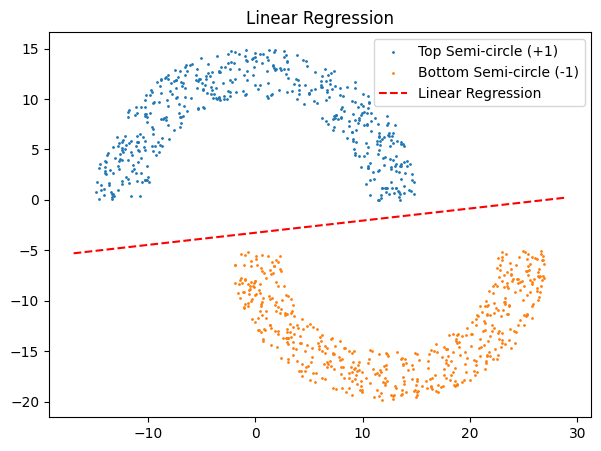

In [305]:
# LP 1 (b)
plot_data_and_boundary(w_lr, "Linear Regression")

In [306]:
def pocket_algorithm(data, labels, max_iterations):
    w = np.zeros(data.shape[1])
    best_w = np.copy(w)
    min_errors = np.mean(np.sign(np.dot(data, w)) != labels)

    error_history = [min_errors]

    for t in range(max_iterations):
        # Pick a random data point
        i = np.random.choice(data.shape[0])
        if np.sign(np.dot(w, data[i])) != labels[i]:
            w_temp = w + labels[i] * data[i]
            current_errors = np.mean(np.sign(np.dot(data, w_temp)) != labels)
            if current_errors < min_errors:
                min_errors = current_errors
                best_w = np.copy(w_temp)
        error_history.append(min_errors)

    return best_w, error_history

w_pocket, error_history = pocket_algorithm(data, labels, max_iterations=100000)
w_pocket

array([ 1.        , -0.05704268, 14.50943697])

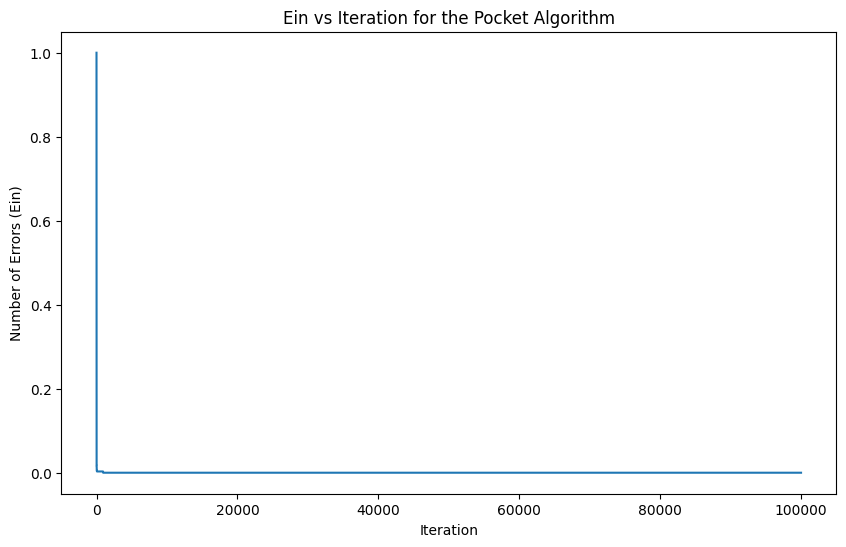

In [307]:
plt.figure(figsize=(10,6))
plt.plot(error_history)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors (Ein)')
plt.title('Ein vs Iteration for the Pocket Algorithm')
plt.show()

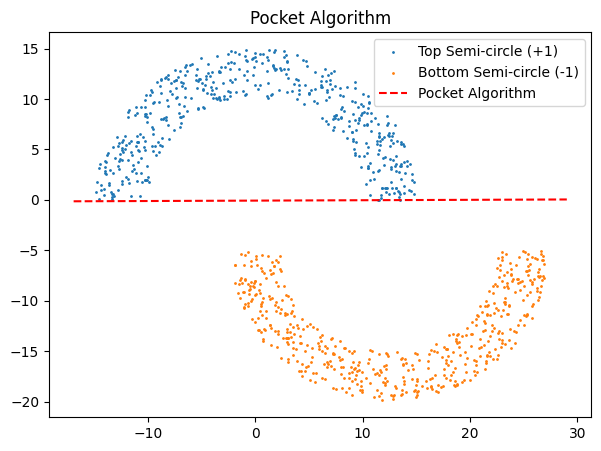

In [308]:
# LP 2 (c)
plot_data_and_boundary(w_pocket, "Pocket Algorithm")

In [309]:
import time
# Compute E_in
def compute_error(w, X, y):
    return np.mean(np.sign(np.dot(X,w)) != y)

# Linear Regression
start_time = time.time()
w_linreg = linear_regression(data, labels)
linreg_time = time.time() - start_time
linreg_error = compute_error(w_linreg, data, labels)

start_time = time.time()
w_pocket, _ = pocket_algorithm(data, labels, max_iterations=100000)
pocket_time = time.time() - start_time
pocket_error = compute_error(w_pocket, data, labels)

# HP 2 (d)
print(f"Linear Regression: Time taken = {linreg_time:.5f} seconds, E_in = {linreg_error:.5f}")
print(f"Pocket Algorithm: Time taken = {pocket_time:.5f} seconds, E_in = {pocket_error:.5f}")

print("\nLinear regression typically runs faster than the Pocket algorithm especially for large iteration counts. ")
print("This is because linear regression uses a direct mathematical approach, while the Pocket algorithm involves iterative improvements over many iterations.")

Linear Regression: Time taken = 0.00596 seconds, E_in = 0.00000
Pocket Algorithm: Time taken = 4.75861 seconds, E_in = 0.00000

Linear regression typically runs faster than the Pocket algorithm especially for large iteration counts. 
This is because linear regression uses a direct mathematical approach, while the Pocket algorithm involves iterative improvements over many iterations.


In [344]:
# Third-order polynomial feature transformation
def transform_features(x):
    X1 = x[:, 1]
    X2 = x[:, 2]
    transformed = np.column_stack([
        x[:, 0],  # Bias term
        X1,
        X2,
        X1**2,
        X2**2,
        X1*X2,
        X1**3,
        X2**3,
        X1**2*X2,
        X1*X2**2
    ])
    return transformed

X_transformed = transform_features(data)

In [323]:
def plot4poly(w0,w1,w2,w3, color='red'):
  axes = plt.gca()
  xlims = axes.get_xlim()
  ylims = axes.get_ylim()
  x1 = np.linspace(xlims[0], xlims[1], 1000)
  x2 = np.linspace(ylims[0], ylims[1], 1000)
  # meshgrid
  XM1, XM2 = np.meshgrid(x1, x2)
  def f(x1, x2, w0, w1, w2, w3):
    return w0 + w1*x1 + w2*(x1**2) + w3*(x1**3) - x2
  plt.contour(XM1, XM2, f(XM1, XM2, w0, w1, w2, w3), 1, colors = color)

In [327]:
X_transformed = np.array([[i[0], i[1], i[1]**2, i[1]**3] for i in data])

In [345]:
w_pocket_transformed, error_history_transformed = pocket_algorithm(X_transformed, labels, max_iterations=100000)
w_pocket_transformed

array([ 1.00000000e+00, -5.70426752e-02,  1.45094370e+01,  3.25386680e-03,
        2.10523761e+02, -8.27657101e-01, -1.85609267e-04,  3.05458124e+03,
        4.72117752e-02, -1.20088385e+01])

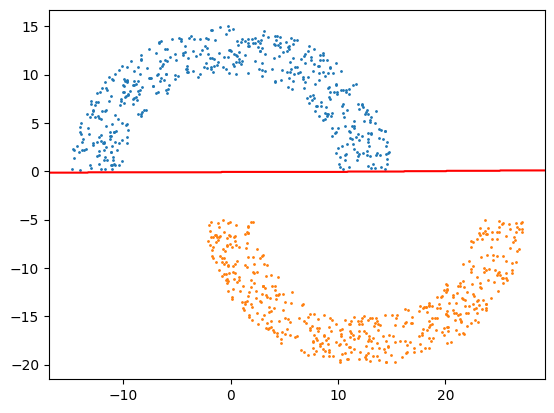

In [360]:
plt.scatter(X1,Y1,s = 1, label='Top Semi-circle (+1)')
plt.scatter(X2,Y2,s = 1, label='Bottom Semi-circle (-1)')

axes = plt.gca()
xlims = axes.get_xlim()
ylims = axes.get_ylim()
x1 = np.linspace(xlims[0], xlims[1], 1000)
x2 = np.linspace(ylims[0], ylims[1], 1000)
xx, yy = np.meshgrid(x1, x2)
grid_features = transform_features(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
Z = np.sign(np.dot(grid_features, w_pocket_transformed))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='r')

plt.show()
#plot4poly(w_pocket_transformed[0],w_pocket_transformed[1],w_pocket_transformed[2],w_pocket_transformed[3])

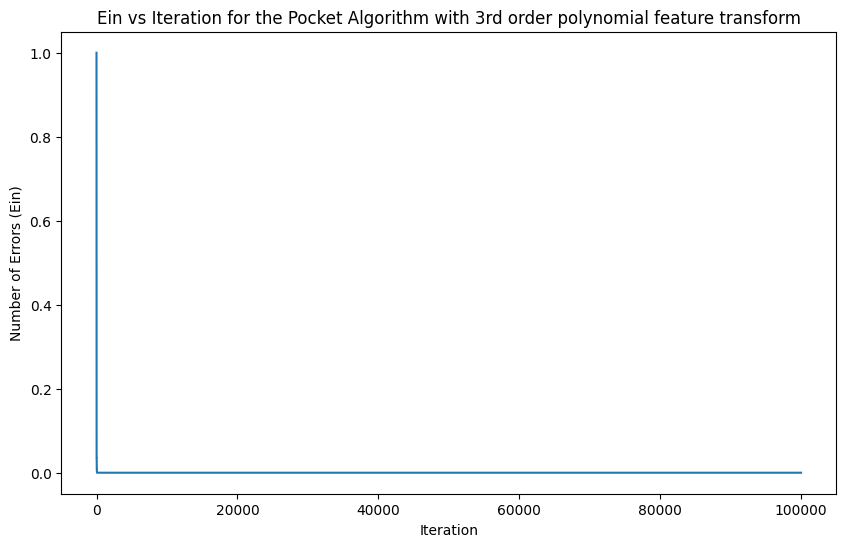

In [348]:
plt.figure(figsize=(10,6))
plt.plot(error_history_transformed)
plt.xlabel('Iteration')
plt.ylabel('Number of Errors (Ein)')
plt.title('Ein vs Iteration for the Pocket Algorithm with 3rd order polynomial feature transform')
plt.show()

In [349]:
# Linear Regression with 3rd order polynomial feature transform
start_time = time.time()
w_linreg_transformed = linear_regression(X_transformed, labels)
linreg_time_transformed = time.time() - start_time
linreg_error_transformed = compute_error(w_linreg_transformed, X_transformed, labels)

# Pocket Algorithm with 3rd order polynomial feature transform
start_time = time.time()
w_pocket_transformed, _ = pocket_algorithm(X_transformed, labels, max_iterations=100000)
pocket_time_transformed = time.time() - start_time
pocket_error_transformed = compute_error(w_pocket_transformed, X_transformed, labels)

# 4. Results
print(f"Linear Regression with 3rd order polynomial feature transform: Time taken = {linreg_time_transformed:.5f} seconds, E_in = {linreg_error_transformed:.5f}")
print(f"Pocket Algorithm with 3rd order polynomial feature transform: Time taken = {pocket_time_transformed:.5f} seconds, E_in = {pocket_error_transformed:.5f}")

print("\nUsing a 3rd order polynomial feature transform can capture more complex relationships in the data. However, it also introduces the risk of overfitting, especially with a limited number of data points.")


Linear Regression with 3rd order polynomial feature transform: Time taken = 0.00373 seconds, E_in = 0.00000
Pocket Algorithm with 3rd order polynomial feature transform: Time taken = 9.71659 seconds, E_in = 0.00000

Using a 3rd order polynomial feature transform can capture more complex relationships in the data. However, it also introduces the risk of overfitting, especially with a limited number of data points.
